In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [9]:
C_range = 10. ** np.arange(-3, 8)
gamma_range = 10. ** np.arange(-5, 4)

In [10]:
param_grid = dict(gamma=gamma_range, C=C_range)
param_grid

{'gamma': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
        1.e+03]),
 'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04,
        1.e+05, 1.e+06, 1.e+07])}

In [11]:
data_num = "3b"

In [12]:
# Loading dataset
df = pd.read_csv("data/d{}/train/{}.csv".format(data_num, data_num))
df.drop(["c/b", "F"], axis=1, inplace=True)
d = df.to_numpy()

X = d[:,:-1]
Y = d[:,-1]
X.shape, Y.shape

((14190, 3), (14190,))

In [ ]:
grid = GridSearchCV(SVR(kernel="rbf"), param_grid=param_grid, cv=KFold())
grid.fit(X, Y)

print("The best classifier is: ", grid.best_estimator_)

In [ ]:
reg = SVR(kernel="rbf", C=100000.0, gamma=0.1)
reg.fit(X, Y)

In [34]:
# Loading test dataset
df = pd.read_csv("data/d{}/test/{}.csv".format(data_num,data_num))
df.drop(["c/b", "F"], axis=1, inplace=True)
d_test = df.to_numpy()

In [35]:
results = reg.predict(d_test[:,:-1])

In [5]:
def sort(data):
    models = []
    model = np.unique(data[:,[0,1,2]], axis=0)
    
    for i in model:
        models.append(data[np.where((data[:,[0,1,2]] == i).all(axis=1))])

    return models 

def compare(models, data_num):
    results_all = []
    results_sep = []
    for model in models:
        result = np.zeros((len(model),6))
        model = np.delete(model, [2,4], 1)

        result[:,4] = reg.predict(model[:,:-1])
        results_all.append(result)
        
        # a/c separated
        result = np.zeros((len(model),6))
        if model[0,0] <= 1:
            result[:,4] = reg.predict(model[:,:-1])

        elif model[0,0] > 1:
            result[:,4] = reg.predict(model[:,:-1])

        else:
            print("Something wrong!")

        results_sep.append(result)
        
    return results_all, results_sep

def plot(models, results_all, results_sep, model_num):
    plt.scatter(models[model_num][:,-3], models[model_num][:,-1], label="Ground Truth")
    plt.plot(models[model_num][:,-3], results_all[model_num][:,4], label="rbf svm all")
#     plt.plot(models[model_num][:,-3], results_sep[model_num][:,4], label="rbf svm separated")
    plt.title("a/c={}; a/t={}; c/b={}".format(models[model_num][0,0],
                                             models[model_num][0,1],
                                             models[model_num][0,2]))
    plt.xlabel("phi")
    plt.ylabel("Mg")
    plt.legend()
    plt.show()
    return

In [6]:
data_num = "3b"
# Loading test dataset
# df = pd.read_csv("data/d{}/test/{}.csv".format(data_num,data_num))
df = pd.read_csv("../data/3_datasets_new/1_RN_data.csv")
# df.drop(["c/b", "F"], axis=1, inplace=True)
d = df.to_numpy()

In [7]:
models = sort(d)
len(models)

32

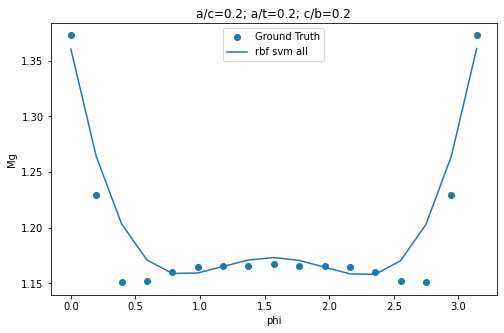

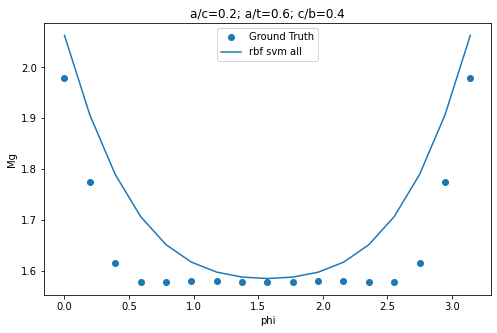

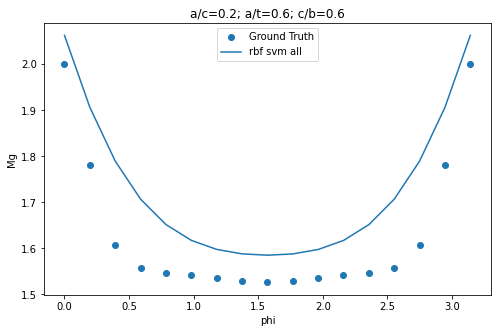

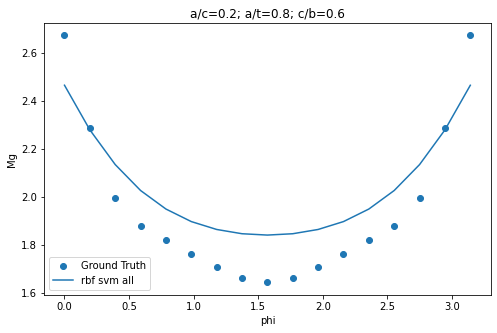

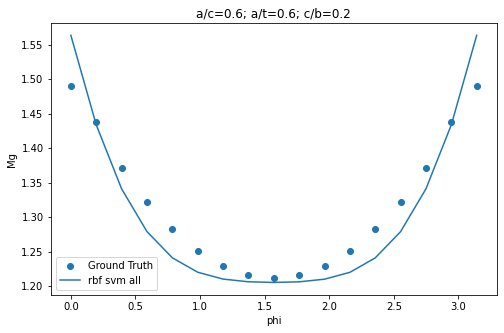

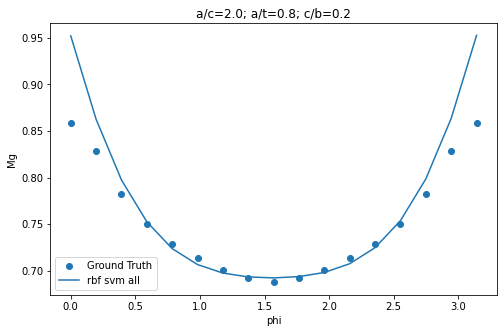

In [65]:
results_all, results_sep = compare(models, data_num)

plt.figure(figsize=(8, 5))
plot(models, results_all, results_sep, 0)

plt.figure(figsize=(8, 5))
plot(models, results_all, results_sep, int(len(models)/8))

plt.figure(figsize=(8, 5))
plot(models, results_all, results_sep, int(len(models)/6))

plt.figure(figsize=(8, 5))
plot(models, results_all, results_sep, int(len(models)/4))

plt.figure(figsize=(8, 5))
plot(models, results_all, results_sep, int(len(models)/2))

plt.figure(figsize=(8, 5))
plot(models, results_all, results_sep, int(len(models)-1))

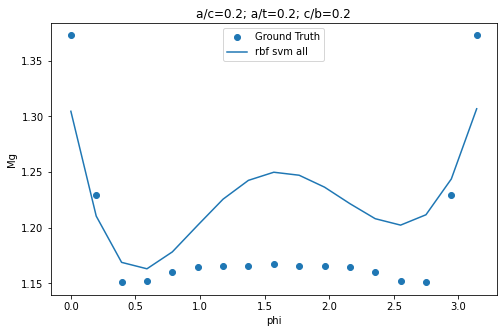

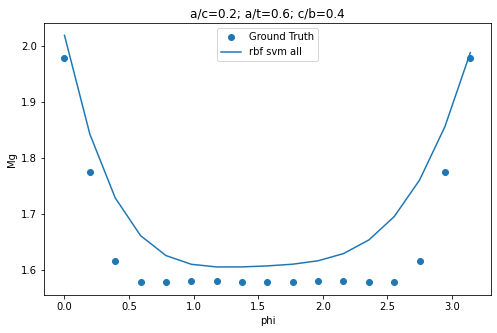

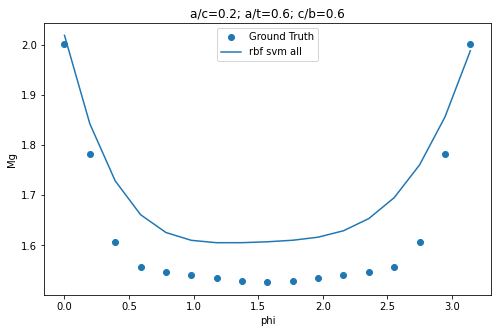

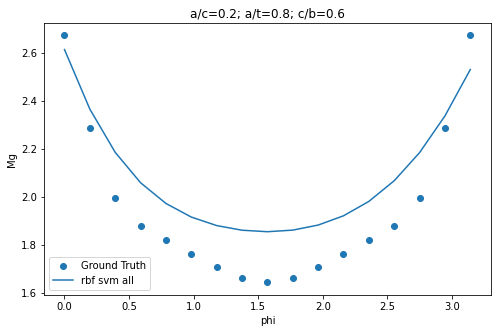

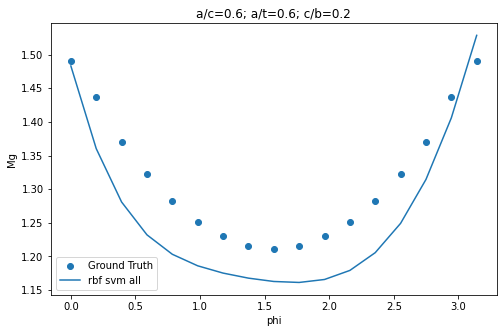

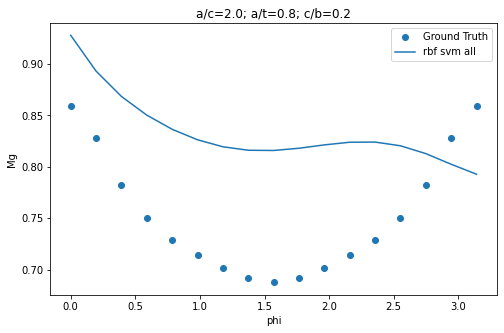

In [8]:
results_all, results_sep = compare(models, data_num)

plt.figure(figsize=(8, 5))
plot(models, results_all, results_sep, 0)

plt.figure(figsize=(8, 5))
plot(models, results_all, results_sep, int(len(models)/8))

plt.figure(figsize=(8, 5))
plot(models, results_all, results_sep, int(len(models)/6))

plt.figure(figsize=(8, 5))
plot(models, results_all, results_sep, int(len(models)/4))

plt.figure(figsize=(8, 5))
plot(models, results_all, results_sep, int(len(models)/2))

plt.figure(figsize=(8, 5))
plot(models, results_all, results_sep, int(len(models)-1))